In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5
from co2_deps import *
from matplotlib import gridspec
import time

In [25]:
def load_time_series_tensor(shot, chord1, chord2):
    # `fid` indicates file ID found in the time series folder
    # `chord1` must be `v1` or `v2`
    # `chord2` must be `v3` or `r0`

    file = h5.File('/projects/EKOLEMEN/ae_andy/AE_data.h5','r')
    
    if chord1=='v1' and chord2=='v3':
        signal1 = np.array(file[str(shot)]['co2']['dp1v1uf'])
        signal2 = np.array(file[str(shot)]['co2']['dp1v3uf'])
    if chord1=='v2' and chord2=='r0':
        signal1 = np.array(file[str(shot)]['co2']['dp1v2uf'])
        signal2 = np.array(file[str(shot)]['co2']['dp1r0uf'])
    
    time = np.array(file[str(shot)]['co2']['co2_time'])
    
    file.close()

    return signal1, signal2, time

In [26]:
shot = 138388
start = time.time()

signal1, _, _ = load_time_series_tensor(shot, 'v1', 'v3')
_, signal2, t = load_time_series_tensor(shot, 'v2', 'r0')

## --- Calculate ---
ampsp, freq, tnew = ae_co2(signal1, signal2, t)

time.time() - start

14.477880239486694

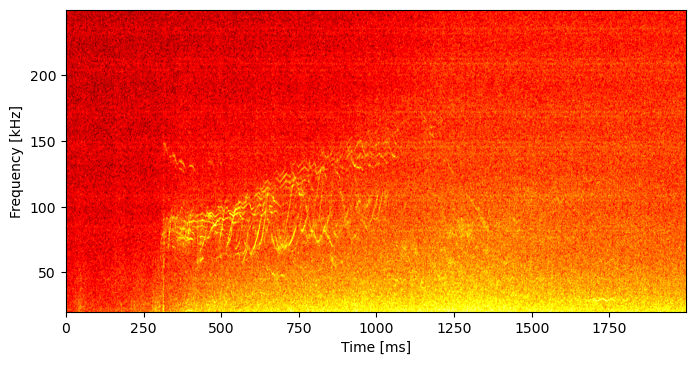

In [27]:
## --- Plot ---
fig = plt.figure(figsize=(8,4),dpi=100)
gs = gridspec.GridSpec(2, 1)
ax2 = plt.subplot(gs[:])

ax2.imshow(np.log(ampsp).T,
           origin='lower', cmap='hot', aspect='auto',
           extent=[tnew.min(), tnew.max(), freq.min(), freq.max()]);
a = plt.ylabel('Frequency [kHz]')
a = plt.xlabel('Time [ms]')

In [75]:
file = h5.File('/scratch/gpfs/ar0535/AE_data_backup/AE_data_backup.h5','r')

In [84]:
file.close()

In [73]:
file.close()

In [85]:
file

<Closed HDF5 file>

In [89]:
file = h5.File('/scratch/gpfs/ar0535/spectrogram_data.hdf5', 'r')

In [91]:
list(file['ece_122117'].keys())

['chn_1',
 'chn_10',
 'chn_11',
 'chn_12',
 'chn_13',
 'chn_14',
 'chn_15',
 'chn_16',
 'chn_17',
 'chn_18',
 'chn_19',
 'chn_2',
 'chn_20',
 'chn_3',
 'chn_4',
 'chn_5',
 'chn_6',
 'chn_7',
 'chn_8',
 'chn_9']